In [1]:
import sys
sys.path.append('/home/wytse/Desktop/led_system_modelling')
import NoiseModule as nm
import SimpaHelper as sh

In [2]:
hdf5_file_path = 'test_structure/61_gt/optical_attenuation_size_frequencyresponse_on_baseline.hdf5'
simpa_helper = sh.SimpaHelper(hdf5_file_path=hdf5_file_path)

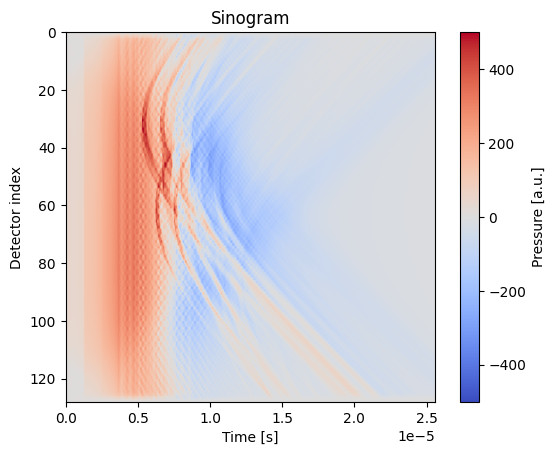

In [4]:
simpa_helper.show_sinogram()

In [6]:
simpa_helper.reconstruct()

/home/wytse/Desktop/packages/venv/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


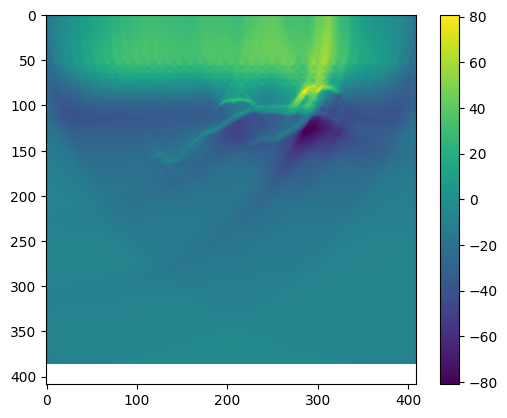

In [7]:
simpa_helper.visualize_reconstruction()